In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = 'notebook'

# CLEANING NIMET DATA

In [2]:
rain_nimet = pd.read_excel('C:/Users/USER/Downloads/nimet dataset anake.xlsx')

In [3]:
rain_nimet.head()

,DATES,MAX TEMP (0C),MIN TEMP (0C),RAIN (mm),RH% 0600Z,RH% 0900Z,RH% 1200Z,RH% 1500Z
0,2010-01-01,32.5,24.5,0.0,97.0,88.0,61.0,52.0
1,2010-01-02,34,23.7,0.0,97.0,81.0,55.0,40.0
2,2010-01-03,33.2,23.8,0.0,96.0,88.0,58.0,42.0
3,2010-01-04,32.1,24.1,0.0,99.0,88.0,61.0,49.0
4,2010-01-05,32.5,24.3,0.0,98.0,84.0,58.0,47.0


This data set is one of two Nimet dataset and contains values for Max temp, min temp rain and relative humidities.
for this analysis we will also be working with pressure hence i will load the second nimet data

In [4]:
pressure_nimet = pd.read_excel('C:/Users/USER/Downloads/nimet dataset 2.xlsx')

In [5]:
pressure_nimet.head()

,S/N,Vapour Pressure 0600Z,Vapour Pressure 0900Z,Vapour Pressure 1200Z,Vapour Pressure 1500Z
0,2010-01-01,30.4,31.3,28,24.0
1,2010-01-02,29.0,31.5,26,20.3
2,2010-01-03,28.6,32.4,27.5,31.3
3,2010-01-04,30.5,31.5,27.8,23.5
4,2010-01-05,30.6,31.5,27.5,23.0


This data gives the various vapour pressure values. and the date column in the rain dataset corresponds with the s/n column.
what needs to be done is, to convert both columns(s/n and Dates) into timestamps and merge the two dataframes.

In [6]:
rain_nimet['DATES'] = pd.to_datetime(rain_nimet['DATES'])

In [7]:
pressure_nimet['S/N'] = pd.to_datetime(pressure_nimet['S/N'])

In [8]:
rain_nimet

,DATES,MAX TEMP (0C),MIN TEMP (0C),RAIN (mm),RH% 0600Z,RH% 0900Z,RH% 1200Z,RH% 1500Z
0,2010-01-01,32.5,24.5,0.0,97.0,88.0,61.0,52.0
1,2010-01-02,34,23.7,0.0,97.0,81.0,55.0,40.0
2,2010-01-03,33.2,23.8,0.0,96.0,88.0,58.0,42.0
3,2010-01-04,32.1,24.1,0.0,99.0,88.0,61.0,49.0
4,2010-01-05,32.5,24.3,0.0,98.0,84.0,58.0,47.0
...,...,...,...,...,...,...,...,...
2917,2017-12-27,NaN,NaN,0.0,90.0,69.0,59.0,46.0
2918,2017-12-28,32.2,NaN,0.0,97.0,77.0,58.0,58.0
2919,2017-12-29,32,NaN,0.0,96.0,84.0,58.0,61.0
2920,2017-12-30,31.8,NaN,0.0,NaN,85.0,62.0,46.0


In [9]:
pressure_nimet

,S/N,Vapour Pressure 0600Z,Vapour Pressure 0900Z,Vapour Pressure 1200Z,Vapour Pressure 1500Z
0,2010-01-01,30.4,31.3,28,24.0
1,2010-01-02,29.0,31.5,26,20.3
2,2010-01-03,28.6,32.4,27.5,31.3
3,2010-01-04,30.5,31.5,27.8,23.5
4,2010-01-05,30.6,31.5,27.5,23.0
...,...,...,...,...,...
2887,2017-12-27,22.3,22.4,24.1,21.8
2888,2017-12-28,25.0,26.6,25.2,27.4
2889,2017-12-29,28.6,30.1,26.6,29.0
2890,2017-12-30,NaN,31.2,27.2,21.2


before merging let us rename the the column in the pressure Nimet data from S/N to Dates.

In [10]:
pressure_nimet.rename(columns={'S/N':'DATES'}, inplace = True)

In [11]:
nimet_data = pd.merge(rain_nimet, pressure_nimet, on = 'DATES', how = 'left')

In [12]:
nimet_data

,DATES,MAX TEMP (0C),MIN TEMP (0C),RAIN (mm),RH% 0600Z,RH% 0900Z,RH% 1200Z,RH% 1500Z,Vapour Pressure 0600Z,Vapour Pressure 0900Z,Vapour Pressure 1200Z,Vapour Pressure 1500Z
0,2010-01-01,32.5,24.5,0.0,97.0,88.0,61.0,52.0,30.4,31.3,28,24.0
1,2010-01-02,34,23.7,0.0,97.0,81.0,55.0,40.0,29.0,31.5,26,20.3
2,2010-01-03,33.2,23.8,0.0,96.0,88.0,58.0,42.0,28.6,32.4,27.5,31.3
3,2010-01-04,32.1,24.1,0.0,99.0,88.0,61.0,49.0,30.5,31.5,27.8,23.5
4,2010-01-05,32.5,24.3,0.0,98.0,84.0,58.0,47.0,30.6,31.5,27.5,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2017-12-27,NaN,NaN,0.0,90.0,69.0,59.0,46.0,22.3,22.4,24.1,21.8
2918,2017-12-28,32.2,NaN,0.0,97.0,77.0,58.0,58.0,25.0,26.6,25.2,27.4
2919,2017-12-29,32,NaN,0.0,96.0,84.0,58.0,61.0,28.6,30.1,26.6,29.0
2920,2017-12-30,31.8,NaN,0.0,NaN,85.0,62.0,46.0,NaN,31.2,27.2,21.2


Now we have a single Nimet data set that contains all the columns we will need. we now have to clean this data set by;
checking for missing values in the columns.

In [13]:
nimet_data.columns=nimet_data.columns.str.strip()

In [14]:
print(nimet_data.isnull().sum())

DATES                      0
MAX TEMP (0C)             32
MIN TEMP  (0C)           152
RAIN (mm)                  2
RH% 0600Z                 52
RH% 0900Z                  2
RH% 1200Z                  5
RH% 1500Z                  2
Vapour Pressure 0600Z     94
Vapour Pressure 0900Z     31
Vapour Pressure 1200Z     33
Vapour Pressure 1500Z     32
dtype: int64


there are a total of 437 missing values in the dataset and the highest coming from the min temp value.
these missing values will be replaced by the mean of each column. Before doing that, we need to replace incorrect values using regexes. after that we convert all the columns to their appropriate dtype.

In [15]:
nimet_data.replace({'32.0*':32.0,'29.1`':29.1, '2 8.0':28.0}, regex = True, inplace = True)

In [16]:
nimet_data = nimet_data.astype({'MAX TEMP (0C)':'float', 'MIN TEMP  (0C)': 'float', 'RH% 0900Z': 'float',
                                'RH% 1200Z': 'float', 'RH% 1500Z': 'float',
                                'Vapour Pressure 0600Z': 'float', 'Vapour Pressure 0900Z': 'float',
                                'Vapour Pressure 1200Z': 'float', 'Vapour Pressure 1500Z': 'float'})

In [17]:
nimet_data["MAX TEMP (0C)"].fillna(value=nimet_data["MAX TEMP (0C)"].mean(), inplace=True)
nimet_data['MIN TEMP  (0C)'].fillna(value=nimet_data['MIN TEMP  (0C)'].mean(), inplace = True)
nimet_data['RAIN (mm)'].fillna(value=nimet_data['RAIN (mm)'].mean(), inplace = True)
nimet_data['RH% 0600Z'].fillna(value =nimet_data['RH% 0600Z'].mean(), inplace = True)                  
nimet_data['RH% 0900Z'].fillna(value =nimet_data['RH% 0900Z'].mean(), inplace = True)                  
nimet_data['RH% 1200Z'].fillna(value =nimet_data['RH% 1200Z'].mean(), inplace = True)                  
nimet_data['RH% 1500Z'].fillna(value =nimet_data['RH% 1500Z'].mean(), inplace = True)                 
nimet_data['Vapour Pressure 0600Z'].fillna(value =nimet_data['Vapour Pressure 0600Z'].mean(), inplace = True)     
nimet_data['Vapour Pressure 0900Z'].fillna(value =nimet_data['Vapour Pressure 0900Z'].mean(), inplace = True)     
nimet_data['Vapour Pressure 1200Z'].fillna(value =nimet_data['Vapour Pressure 1200Z'].mean(), inplace = True)     
nimet_data['Vapour Pressure 1500Z'].fillna(value =nimet_data['Vapour Pressure 1500Z'].mean(), inplace = True) 

In [18]:
nimet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2922 entries, 0 to 2921
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATES                  2922 non-null   datetime64[ns]
 1   MAX TEMP (0C)          2922 non-null   float64       
 2   MIN TEMP  (0C)         2922 non-null   float64       
 3   RAIN (mm)              2922 non-null   float64       
 4   RH% 0600Z              2922 non-null   float64       
 5   RH% 0900Z              2922 non-null   float64       
 6   RH% 1200Z              2922 non-null   float64       
 7   RH% 1500Z              2922 non-null   float64       
 8   Vapour Pressure 0600Z  2922 non-null   float64       
 9   Vapour Pressure 0900Z  2922 non-null   float64       
 10  Vapour Pressure 1200Z  2922 non-null   float64       
 11  Vapour Pressure 1500Z  2922 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 296.8 KB


the Number of entries corresponds with the number of days from 2010 to 2017

In [19]:
nimet_data.describe()

,MAX TEMP (0C),MIN TEMP (0C),RAIN (mm),RH% 0600Z,RH% 0900Z,RH% 1200Z,RH% 1500Z,Vapour Pressure 0600Z,Vapour Pressure 0900Z,Vapour Pressure 1200Z,Vapour Pressure 1500Z
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,30.788408,23.311191,11.008459,95.400279,85.298116,73.924751,73.547842,29.920332,31.394016,30.211267,30.438671
std,2.597948,1.395527,24.405016,5.618662,9.367040,13.198427,14.003769,49.624592,40.760783,6.119918,8.673746
min,3.500000,13.200000,0.000000,33.000000,8.000000,25.000000,18.000000,7.600000,3.500000,11.200000,2.000000
25%,29.000000,22.700000,0.000000,95.000000,81.000000,66.000000,65.000000,28.000000,29.500000,29.300000,29.400000
50%,31.000000,23.400000,0.000000,96.000000,86.000000,74.000000,75.000000,29.500000,31.000000,30.600000,30.600000
75%,32.700000,24.000000,9.200000,97.000000,92.000000,83.000000,84.000000,30.400000,32.500000,31.900000,32.000000
max,38.000000,34.300000,238.900000,100.000000,100.000000,100.000000,100.000000,2706.000000,2207.000000,312.000000,286.000000


In [20]:
nimet_data.to_csv('C:/Users/USER/Downloads/nimet data.csv')

Max Temp minimum value indicates there are outliers in that column
rain with a mean value of 11 and a max value of 238.9 may indicate outliers are present but given that 75 percentile is greatert than 9.2 it may be an indication of unusual weather condition. 
A high standard deviation is observed in vapour pressures by 6am and vapour pressure by 9am this could be due to changes in temperature, windspeed, or other environmental factors that affect vapour pressure. This will better be understood during the Exploratory Data Analysis. 

# FEATURE ENGINEERING AND CLEANING NASA DATA.

In [21]:
nasa_data = pd.read_csv('C:/Users/USER/Downloads/nasa dataset anake1.csv')

In [22]:
nasa_data

,YEAR,MO,DY,HR,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M
0,2010,1,1,0,24.37,21.81,23.09,16.30,85.56,0.0,100.66,1.79,240.97
1,2010,1,1,1,24.14,21.77,22.95,16.30,86.56,0.0,100.62,1.65,243.92
2,2010,1,1,2,23.99,21.75,22.87,16.24,87.19,0.0,100.58,1.47,250.12
3,2010,1,1,3,23.87,21.80,22.83,16.30,88.12,0.0,100.58,1.31,255.88
4,2010,1,1,4,23.74,21.85,22.80,16.36,89.12,0.0,100.60,1.19,263.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,2017,12,31,19,25.40,20.30,22.85,14.83,73.25,0.0,100.65,1.75,298.86
70124,2017,12,31,20,25.11,19.84,22.48,14.40,72.56,0.0,100.73,1.73,295.75
70125,2017,12,31,21,24.87,19.41,22.14,14.04,71.62,0.0,100.78,1.66,296.93
70126,2017,12,31,22,24.74,18.89,21.82,13.55,69.88,0.0,100.78,1.48,303.61


Parameter(s): 				
T2M             MERRA-2 Temperature at 2 Meters (C) 

T2MDEW          MERRA-2 Dew/Frost Point at 2 Meters (C) 

T2MWET          MERRA-2 Wet Bulb Temperature at 2 Meters (C) 

QV2M            MERRA-2 Specific Humidity at 2 Meters (g/kg) 

RH2M            MERRA-2 Relative Humidity at 2 Meters (%) 

PRECTOTCORR     MERRA-2 Precipitation Corrected (mm/hour)

PS              MERRA-2 Surface Pressure (kPa) 	

WS10M           MERRA-2 Wind Speed at 10 Meters (m/s)

WD10M           MERRA-2 Wind Direction at 10 Meters (Degrees) 


we will not be using wind speed, wind driection, specific humidity and precipitation so lets go ahead and drop them.

In [23]:
nasa_data.drop(columns = ['QV2M', 'PRECTOTCORR', 'WS10M', 'WD10M'], inplace = True)

Given that Max temp and Min Temp are not in the dataset we have to obtain them using the following conventional method.
calculate the specific volume of the air
calculate the adiabatic saturation temperature
calculate the minimum temperature in Celsius(this is because we are working with celsuis values)
calculate the maximum temperature in Celsius
add the new columns to the input table

In [24]:
def calculate_min_max_temp(dataframe):
# calculate the specific volume of the air
    specific_volume = 0.287 / (nasa_data['T2M'] + 273 - 0.0065 * 2)

    # calculate the adiabatic saturation temperature
    adiabatic_saturation_temp = nasa_data['T2MWET'] + ((2501 - 2.381 * nasa_data['T2MWET']) * specific_volume)

    # calculate the minimum temperature in Celsius
    min_temp = adiabatic_saturation_temp - nasa_data['T2MDEW']

    # calculate the maximum temperature in Celsius
    max_temp = adiabatic_saturation_temp

    # add the new columns to the input table
    nasa_data['min_temp'] = min_temp
    nasa_data['max_temp'] = max_temp
    return nasa_data

In [25]:
nasa_data = calculate_min_max_temp(nasa_data)

In [26]:
nasa_data.head()

,YEAR,MO,DY,HR,T2M,T2MDEW,T2MWET,RH2M,PS,min_temp,max_temp
0,2010,1,1,0,24.37,21.81,23.09,85.56,100.66,3.640827,25.450827
1,2010,1,1,1,24.14,21.77,22.95,86.56,100.62,3.542977,25.312977
2,2010,1,1,2,23.99,21.75,22.87,87.19,100.58,3.484354,25.234354
3,2010,1,1,3,23.87,21.80,22.83,88.12,100.58,3.395402,25.195402
4,2010,1,1,4,23.74,21.85,22.80,89.12,100.60,3.316508,25.166508


we need to obtain the relative humidity at hours 6, 9, 12 and 15 as well as that of the vapour pressure. This will be added to new columns.

In [27]:
def relative_humidity_by_hours(dataset):
    # define the specific hours you want to calculate relative humidity for
    hours = [6, 9, 12, 15]

    # iterate over each hour and create a new column for the relative humidity at that hour
    for hour in hours:
        if any(nasa_data['HR'] == hour):
        # create a new column name for the relative humidity at the specific hour
            column_name = 'RH' + str(hour) + 'h'
            # add the relative humidity values at the specific hour to the new column
            nasa_data[column_name] = nasa_data.loc[nasa_data['HR'] == hour, 'RH2M']

    return (nasa_data)

    

In [28]:
nasa_data = relative_humidity_by_hours(nasa_data)

following the same pattern we can obtain the vapour pressure at hours 6, 9, 12 and 15

In [29]:
def vapour_pressure_by_hour(dataset):
    # define the specific hours you want to calculate relative humidity for
    hours = [6, 9, 12, 15]

    # iterate over each hour and create a new column for the relative humidity at that hour
    for hour in hours:
        if any(nasa_data['HR'] == hour):
        # create a new column name for the relative humidity at the specific hour
            column_name = 'vp' + str(hour) + 'h'
            # add the relative humidity values at the specific hour to the new column
            nasa_data[column_name] = nasa_data.loc[nasa_data['HR'] == hour, 'PS']

    return (nasa_data)

In [30]:
nasa_data=vapour_pressure_by_hour(nasa_data)

we can go ahead to drop the now irrelevant columns

In [31]:
nasa_data.drop(columns=['T2M','T2MDEW','T2MWET','RH2M','PS'], inplace = True)

lets get our date columns now from the year month and day columns 

In [32]:
def create_dates(dataframe):
    cols = ['YEAR','MO','DY']
    nasa_data['Dates'] = nasa_data[cols].apply(lambda x : '-'.join(x.values.astype(str)), axis= 'columns')
    nasa_data['Dates']= pd.to_datetime(nasa_data['Dates'])
    return nasa_data

In [33]:
nasa_data = create_dates(nasa_data)

In [34]:
nasa_data.drop(columns = ['YEAR','MO', 'DY'], inplace = True)

let get just one value for every single day. we would do this by getting the mean of each day.

In [35]:
nasa_data.set_index(['Dates', 'HR'], inplace = True)

In [36]:
nasa_data = nasa_data.groupby(level='Dates').mean()

# Reset the index to convert the day index back to a column
nasa_data.reset_index(inplace=True)

In [37]:
nasa_data

,Dates,min_temp,max_temp,RH6h,RH9h,RH12h,RH15h,vp6h,vp9h,vp12h,vp15h
0,2010-01-01,4.392044,26.988294,92.00,77.69,60.94,58.31,100.66,100.80,100.62,100.42
1,2010-01-02,4.559388,26.387722,100.00,79.94,60.25,54.94,100.67,100.84,100.60,100.40
2,2010-01-03,6.320207,23.538957,76.94,62.69,49.94,49.44,100.62,100.76,100.60,100.44
3,2010-01-04,6.310649,23.794816,72.62,59.75,46.25,48.12,100.64,100.78,100.63,100.41
4,2010-01-05,4.653823,26.736740,96.38,80.56,60.06,58.19,100.59,100.76,100.62,100.38
...,...,...,...,...,...,...,...,...,...,...,...
2917,2017-12-27,4.802628,26.167211,89.50,71.56,57.44,58.19,100.49,100.63,100.47,100.31
2918,2017-12-28,4.407056,27.137473,94.31,73.50,59.12,62.44,100.52,100.66,100.47,100.30
2919,2017-12-29,4.101461,27.143544,97.38,79.75,64.00,63.25,100.64,100.79,100.62,100.41
2920,2017-12-30,4.517189,26.262605,95.50,81.31,66.00,57.56,100.70,100.89,100.69,100.54


we now have our Nasa data with similar number of rows as the Nimet data and can easily be used for comparative analysis.
but before that we need to carry out the remaining cleaning process.


In [38]:
nasa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Dates     2922 non-null   datetime64[ns]
 1   min_temp  2922 non-null   float64       
 2   max_temp  2922 non-null   float64       
 3   RH6h      2922 non-null   float64       
 4   RH9h      2922 non-null   float64       
 5   RH12h     2922 non-null   float64       
 6   RH15h     2922 non-null   float64       
 7   vp6h      2922 non-null   float64       
 8   vp9h      2922 non-null   float64       
 9   vp12h     2922 non-null   float64       
 10  vp15h     2922 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 251.2 KB


we have no null values and our data is in the appropriate dtype.

In [39]:
nasa_data.to_csv('C:/Users/USER/Downloads/nasa data.csv')

# EXPLORATORY DATA ANALYSIS OF NIMET DATA

Using the Nimet Dataset that has been properly cleaned in the previous section 

In [40]:
nimet_data

,DATES,MAX TEMP (0C),MIN TEMP (0C),RAIN (mm),RH% 0600Z,RH% 0900Z,RH% 1200Z,RH% 1500Z,Vapour Pressure 0600Z,Vapour Pressure 0900Z,Vapour Pressure 1200Z,Vapour Pressure 1500Z
0,2010-01-01,32.500000,24.500000,0.0,97.000000,88.0,61.0,52.0,30.400000,31.3,28.0,24.0
1,2010-01-02,34.000000,23.700000,0.0,97.000000,81.0,55.0,40.0,29.000000,31.5,26.0,20.3
2,2010-01-03,33.200000,23.800000,0.0,96.000000,88.0,58.0,42.0,28.600000,32.4,27.5,31.3
3,2010-01-04,32.100000,24.100000,0.0,99.000000,88.0,61.0,49.0,30.500000,31.5,27.8,23.5
4,2010-01-05,32.500000,24.300000,0.0,98.000000,84.0,58.0,47.0,30.600000,31.5,27.5,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2017-12-27,30.788408,23.311191,0.0,90.000000,69.0,59.0,46.0,22.300000,22.4,24.1,21.8
2918,2017-12-28,32.200000,23.311191,0.0,97.000000,77.0,58.0,58.0,25.000000,26.6,25.2,27.4
2919,2017-12-29,32.000000,23.311191,0.0,96.000000,84.0,58.0,61.0,28.600000,30.1,26.6,29.0
2920,2017-12-30,31.800000,23.311191,0.0,95.400279,85.0,62.0,46.0,29.920332,31.2,27.2,21.2


In [41]:
nimet_data.describe()

,MAX TEMP (0C),MIN TEMP (0C),RAIN (mm),RH% 0600Z,RH% 0900Z,RH% 1200Z,RH% 1500Z,Vapour Pressure 0600Z,Vapour Pressure 0900Z,Vapour Pressure 1200Z,Vapour Pressure 1500Z
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,30.788408,23.311191,11.008459,95.400279,85.298116,73.924751,73.547842,29.920332,31.394016,30.211267,30.438671
std,2.597948,1.395527,24.405016,5.618662,9.367040,13.198427,14.003769,49.624592,40.760783,6.119918,8.673746
min,3.500000,13.200000,0.000000,33.000000,8.000000,25.000000,18.000000,7.600000,3.500000,11.200000,2.000000
25%,29.000000,22.700000,0.000000,95.000000,81.000000,66.000000,65.000000,28.000000,29.500000,29.300000,29.400000
50%,31.000000,23.400000,0.000000,96.000000,86.000000,74.000000,75.000000,29.500000,31.000000,30.600000,30.600000
75%,32.700000,24.000000,9.200000,97.000000,92.000000,83.000000,84.000000,30.400000,32.500000,31.900000,32.000000
max,38.000000,34.300000,238.900000,100.000000,100.000000,100.000000,100.000000,2706.000000,2207.000000,312.000000,286.000000


No handles with labels found to put in legend.


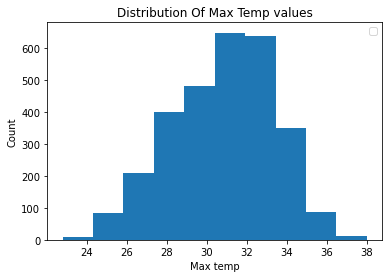

In [125]:
plt.hist(nimet_data['MAX TEMP (0C)'])
plt.xlabel('Max temp')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution Of Max Temp values')
plt.show()
#px.histogram(data_frame= nimet_data, x = 'MAX TEMP (0C)', title = 'Distribution Of Max Temp values')

this shows a normal distribution except for the value of 3.5
this value is most likely an error and will be replace with 35

In [43]:
nimet_data['MAX TEMP (0C)'].replace({3.5:35}, inplace = True)

lets visualize the distribution again 

No handles with labels found to put in legend.


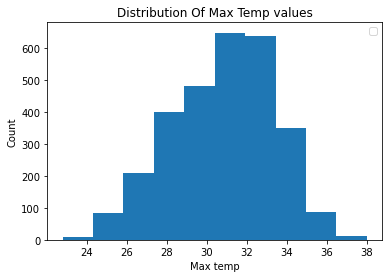

In [126]:
plt.hist(nimet_data['MAX TEMP (0C)'])
plt.xlabel('Max temp')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution Of Max Temp values')
plt.show()
#px.histogram(data_frame= nimet_data, x = 'MAX TEMP (0C)', title = 'Distribution Of Max Temp values')

we can observe a normal distribution of values of the max temperature

No handles with labels found to put in legend.


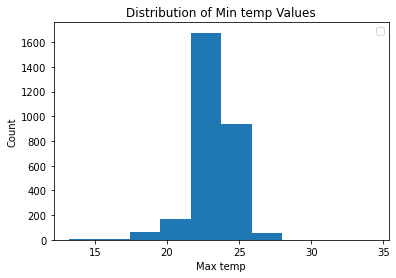

In [127]:
plt.hist(nimet_data['MIN TEMP  (0C)'])
plt.xlabel('Max temp')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Min temp Values')
plt.show()
#px.histogram(data_frame= nimet_data, x = 'MIN TEMP  (0C)', title = 'Distribution of Min temp Values')

No handles with labels found to put in legend.


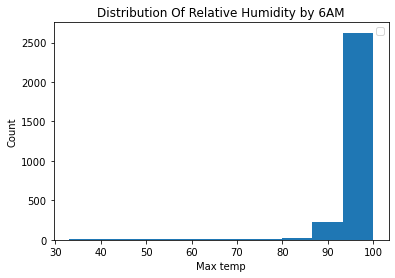

In [130]:
plt.hist(nimet_data['RH% 0600Z'])
plt.xlabel('Relative Humidity')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution Of Relative Humidity by 6AM')
plt.show()
#px.histogram(data_frame = nimet_data, x = 'RH% 0600Z', title = 'Distribution Of Relative Humidity by 6AM')

No handles with labels found to put in legend.


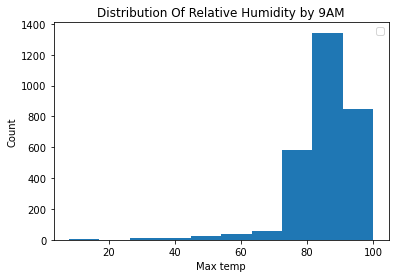

In [131]:
plt.hist(nimet_data['RH% 0900Z'])
plt.xlabel('Relative Humidity')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution Of Relative Humidity by 9AM')
plt.show()
#px.histogram(data_frame = nimet_data, x = 'RH% 0900Z', title = 'Distribution Of Relative Humidity by 9AM')

No handles with labels found to put in legend.


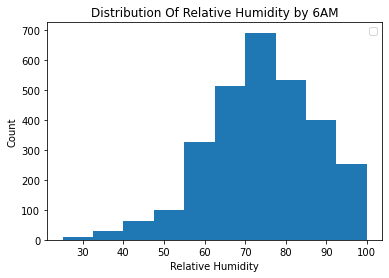

In [132]:
plt.hist(nimet_data['RH% 1200Z'])
plt.xlabel('Relative Humidity')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution Of Relative Humidity by 6AM')
plt.show()
#px.histogram(data_frame = nimet_data, x = 'RH% 1200Z', title = 'Distribution Of Relative Humidity by 12PM')

No handles with labels found to put in legend.


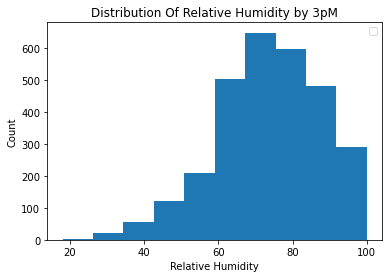

In [134]:
plt.hist(nimet_data['RH% 1500Z'])
plt.xlabel('Relative Humidity')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution Of Relative Humidity by 3pM')
plt.show()
#px.histogram(data_frame = nimet_data, x = 'RH% 1500Z', title = 'Distribution Of Relative Humidity by 3PM')

this shows that the mean relative humidity reduces with increase to time. therefore according to the data its likely to be more humid early in the mornings than it is in the afternoons. a wider std maybe an indication of seasonal changes.

the large disparity between the max and min shows a computational error 

In [50]:
nimet_data['Vapour Pressure 0600Z'].replace({2706:27.06}, inplace = True)

No handles with labels found to put in legend.


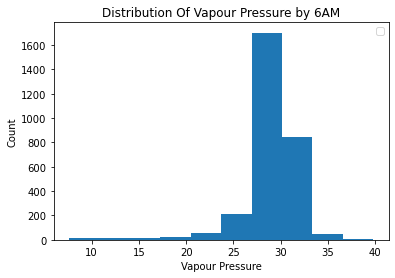

In [135]:
plt.hist(nimet_data['Vapour Pressure 0600Z'])
plt.xlabel('Vapour Pressure')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution Of Vapour Pressure by 6AM')
plt.show()
#px.histogram(data_frame = nimet_data, x = 'Vapour Pressure 0600Z', title = 'Distribution Of Vapour Pressure by 6AM')

getting rid of Outliers in vapour Pressure Values.

In [52]:
nimet_data['Vapour Pressure 0600Z'].replace({96:29}, inplace = True)
nimet_data['Vapour Pressure 0900Z'].replace({2207:22.07, 321.2:32.22}, inplace = True)
nimet_data['Vapour Pressure 1200Z'].replace({312:31.2}, inplace = True)
nimet_data['Vapour Pressure 1500Z'].replace({286:28.6, 285:28.5, 267:26.7, 89:30}, inplace = True)

No handles with labels found to put in legend.


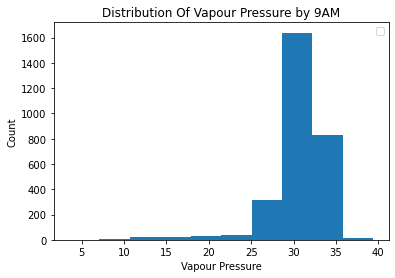

In [136]:
plt.hist(nimet_data['Vapour Pressure 0900Z'])
plt.xlabel('Vapour Pressure')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution Of Vapour Pressure by 9AM')
plt.show()
#px.histogram(data_frame = nimet_data, x = 'Vapour Pressure 0900Z', title = 'Distribution Of Vapour Pressure by 9AM')

No handles with labels found to put in legend.


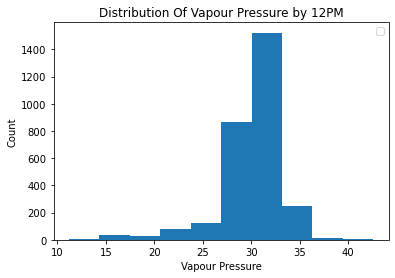

In [137]:
plt.hist(nimet_data['Vapour Pressure 1200Z'])
plt.xlabel('Vapour Pressure')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution Of Vapour Pressure by 12PM')
plt.show()
#px.histogram(data_frame = nimet_data, x = 'Vapour Pressure 1200Z', title = 'Distribution Of Vapour Pressure by 12PM')

No handles with labels found to put in legend.


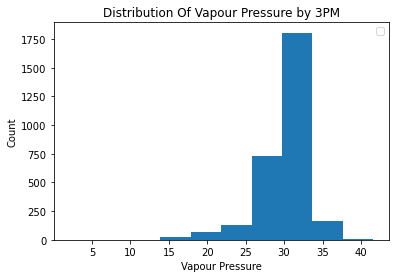

In [138]:
plt.hist(nimet_data['Vapour Pressure 1500Z'])
plt.xlabel('Vapour Pressure')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution Of Vapour Pressure by 3PM')
plt.show()
#px.histogram(data_frame = nimet_data, x = 'Vapour Pressure 1500Z', title = 'Distribution Of Vapour Pressure by 3PM')

lets explore their relationship with dates to examine if some values are due to seasonal changes. 

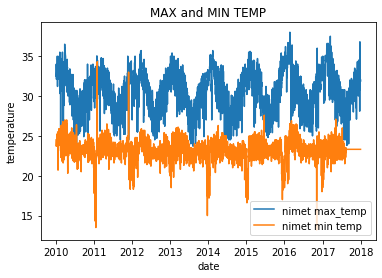

In [97]:
plt.plot(nimet_data['DATES'], nimet_data['MAX TEMP (0C)'], label = 'nimet max_temp')
plt.plot(nimet_data['DATES'], nimet_data['MIN TEMP  (0C)'], label = 'nimet min temp')
plt.xlabel('date')
plt.ylabel('temperature')
plt.legend()
plt.title('MAX and MIN TEMP')
plt.show()
#px.line(data_frame = nimet_data, x= 'DATES', y = ['MAX TEMP (0C)', 'MIN TEMP  (0C)'], title = 'MAX and MIN TEMP')

the curves shows the changes in max and Min temperature due to seasonal changes in the Tropics. The lower minimum temperature around the december january period indicating harmattan. and the lower max temperature indicates the cooler rainy season.

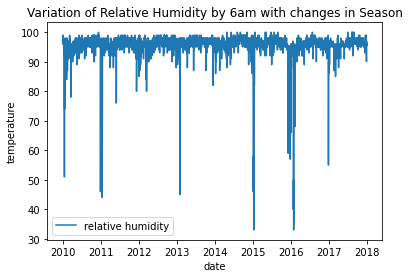

In [98]:
plt.plot(nimet_data['DATES'], nimet_data['RH% 0600Z'], label = 'relative humidity')
plt.xlabel('date')
plt.ylabel('Humidity')
plt.legend()
plt.title('Variation of Relative Humidity by 6am with changes in Season')
plt.show()
#px.line(data_frame = nimet_data, x= 'DATES', y = 'RH% 0600Z', title = 'Variation of Relative Humidity by 6am with changes in Season')

The Lower values of relative Humidity by 6am indicates the low humidity due to the harmattan season. 

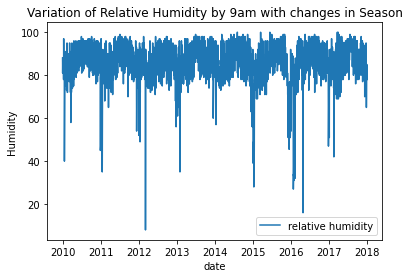

In [99]:
plt.plot(nimet_data['DATES'], nimet_data['RH% 0900Z'], label = 'relative humidity')
plt.xlabel('date')
plt.ylabel('Humidity')
plt.legend()
plt.title('Variation of Relative Humidity by 9am with changes in Season')
plt.show()
#px.line(data_frame = nimet_data, x= 'DATES', y = 'RH% 0900Z', title = 'Variation of Relative Humidity by 9am with changes in Season')

The more Uniform curves observed in the relative Humidity by 9am can be attributed to the fact that less Missing values were present in 9am data than in the 6am data

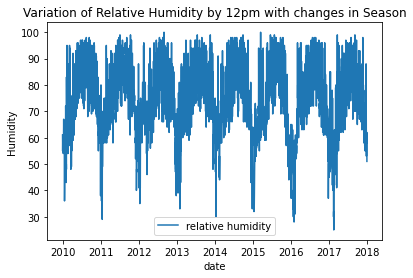

In [100]:
plt.plot(nimet_data['DATES'], nimet_data['RH% 1200Z'], label = 'relative humidity')
plt.xlabel('date')
plt.ylabel('Humidity')
plt.legend()
plt.title('Variation of Relative Humidity by 12pm with changes in Season')
plt.show()
#px.line(data_frame = nimet_data, x= 'DATES', y = 'RH% 1200Z', title = 'Variation of Relative Humidity by 12pm with changes in Season')

This curves show that it is much more Humid during the rainy season and less Humid during the dry season and the Overall reduction in mean relative humidity indicates its more humid in the mornings than in the afternoons.

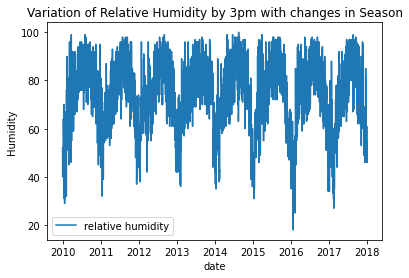

In [101]:
plt.plot(nimet_data['DATES'], nimet_data['RH% 1500Z'], label = 'relative humidity')
plt.xlabel('date')
plt.ylabel('Humidity')
plt.legend()
plt.title('Variation of Relative Humidity by 3pm with changes in Season')
plt.show()
#px.line(data_frame = nimet_data, x= 'DATES', y = 'RH% 1500Z', title = 'Variation of Relative Humidity by 3pm with changes in Season')

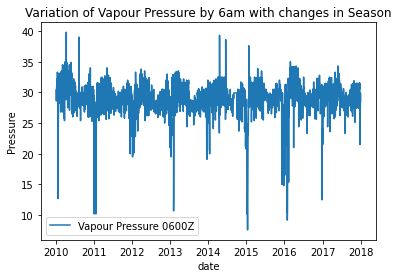

In [102]:
plt.plot(nimet_data['DATES'], nimet_data['Vapour Pressure 0600Z'], label = 'Vapour Pressure 0600Z')
plt.xlabel('date')
plt.ylabel('Pressure')
plt.legend()
plt.title('Variation of Vapour Pressure by 6am with changes in Season')
plt.show()
#px.line(data_frame = nimet_data, x= 'DATES', y = 'Vapour Pressure 0600Z', title = 'Variation of Vapour Pressure by 6am with changes in Season')

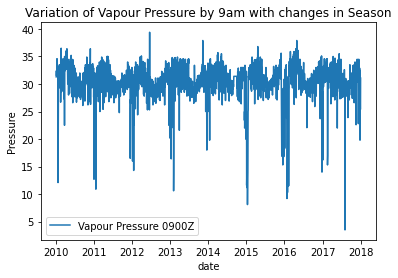

In [103]:
plt.plot(nimet_data['DATES'], nimet_data['Vapour Pressure 0900Z'], label = 'Vapour Pressure 0900Z')
plt.xlabel('date')
plt.ylabel('Pressure')
plt.legend()
plt.title('Variation of Vapour Pressure by 9am with changes in Season')
plt.show()
#px.line(data_frame = nimet_data, x= 'DATES', y = 'Vapour Pressure 0900Z', title = 'Variation of Vapour Pressure by 9am with changes in Season')

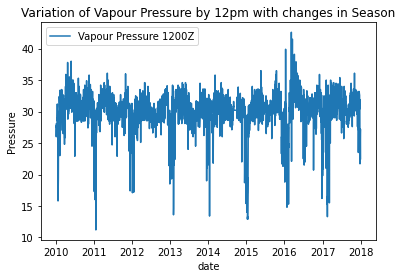

In [104]:
plt.plot(nimet_data['DATES'], nimet_data['Vapour Pressure 1200Z'], label = 'Vapour Pressure 1200Z')
plt.xlabel('date')
plt.ylabel('Pressure')
plt.legend()
plt.title('Variation of Vapour Pressure by 12pm with changes in Season')
plt.show()
#px.line(data_frame = nimet_data, x= 'DATES', y = 'Vapour Pressure 1200Z', title = 'Variation of Vapour Pressure by 12pm with changes in Season')

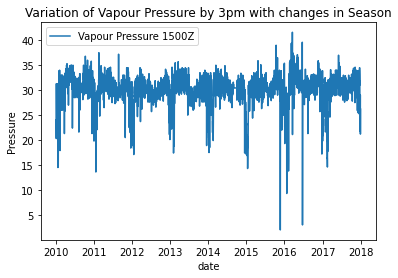

In [105]:
plt.plot(nimet_data['DATES'], nimet_data['Vapour Pressure 1500Z'], label = 'Vapour Pressure 1500Z')
plt.xlabel('date')
plt.ylabel('Pressure')
plt.legend()
plt.title('Variation of Vapour Pressure by 3pm with changes in Season')
plt.show()
#px.line(data_frame = nimet_data, x= 'DATES', y = 'Vapour Pressure 1500Z', title = 'Variation of Vapour Pressure by 3pm with changes in Season')

There seems to be Lower vapour pressure around the Harmattan Period. could be an Indicator that lower vapour pressure correlates with less humid air and in turn correlates with lower temperatures. 

# Correlation Of NIMET Data

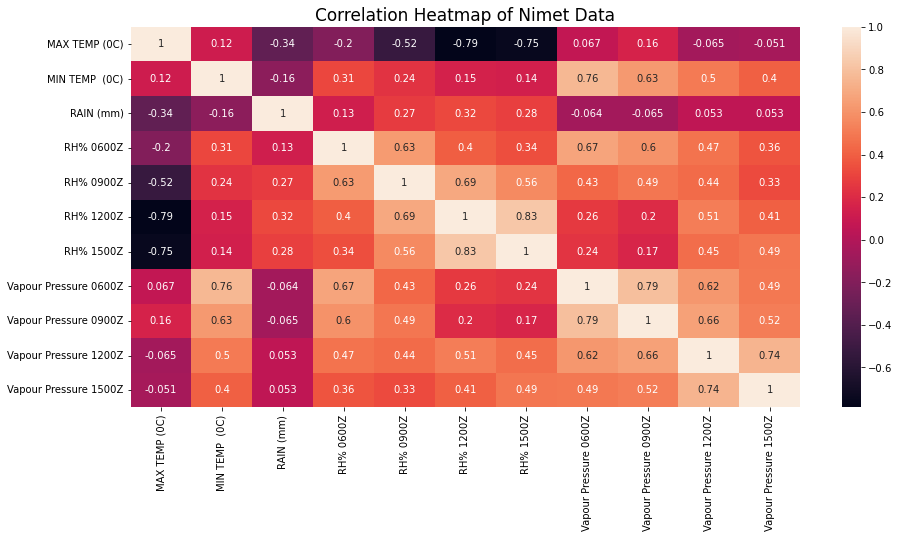

In [65]:
plt.figure(figsize=(15,7))
plt.title('Correlation Heatmap of Nimet Data', size = 17)
sns.heatmap(nimet_data.corr(), annot = True)
plt.show()

we can observe a strong negative correlation between Max temperature and Relative Humidity. we can also see a strong correlation between Min Temperature and the Vapour Pressure by 6am and another correlation between relative Humidity by 6am and vapour Pressure by 6am.

# visualizing Individual correlations of Nimet Data

No handles with labels found to put in legend.


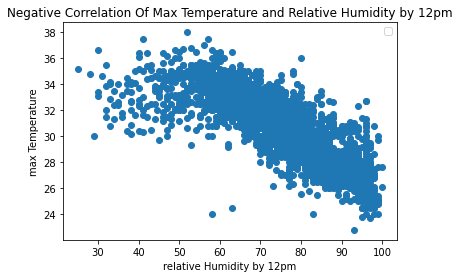

In [107]:
plt.scatter(nimet_data['RH% 1200Z'],nimet_data['MAX TEMP (0C)'])
plt.xlabel('relative Humidity by 12pm')
plt.ylabel('max Temperature')
plt.legend()
plt.title('Negative Correlation Of Max Temperature and Relative Humidity by 12pm')
plt.show()
#px.scatter(data_frame= nimet_data, x ='RH% 1200Z', y = 'MAX TEMP (0C)', title = 'Negative Correlation Of Max Temperature and Relative Humidity by 12pm' )

No handles with labels found to put in legend.


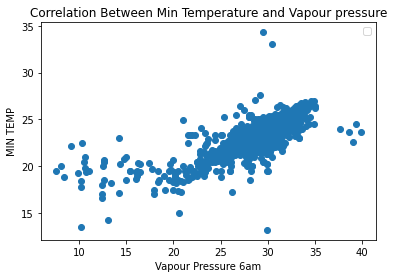

In [108]:
plt.scatter(nimet_data['Vapour Pressure 0600Z'],nimet_data['MIN TEMP  (0C)'])
plt.xlabel('Vapour Pressure 6am')
plt.ylabel('MIN TEMP')
plt.legend()
plt.title('Correlation Between Min Temperature and Vapour pressure')
plt.show()
#px.scatter(data_frame = nimet_data, x = 'Vapour Pressure 0600Z', y = 'MIN TEMP  (0C)', title = 'Correlation Between Min Temperature and Vapour pressure')

No handles with labels found to put in legend.


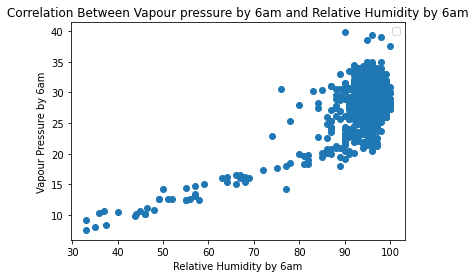

In [109]:
plt.scatter(nimet_data['RH% 0600Z'], nimet_data['Vapour Pressure 0600Z'])
plt.xlabel('Relative Humidity by 6am')
plt.ylabel('Vapour Pressure by 6am')
plt.legend()
plt.title('Correlation Between Vapour pressure by 6am and Relative Humidity by 6am')
plt.show()
#px.scatter(data_frame = nimet_data, x = 'RH% 0600Z', y = 'Vapour Pressure 0600Z')

# EXPLORATORY DATA ANALYSIS OF NASA DATA

In [69]:
nasa_data.describe()

,min_temp,max_temp,RH6h,RH9h,RH12h,RH15h,vp6h,vp9h,vp12h,vp15h
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,3.536653,27.058181,96.197957,84.140907,73.996051,74.949682,100.675924,100.833196,100.676338,100.479918
std,0.687927,1.132512,3.645533,7.423038,9.661319,10.233218,0.174524,0.171358,0.170595,0.172150
min,2.670599,19.676077,63.000000,40.000000,34.190000,36.620000,100.190000,100.390000,100.230000,99.980000
25%,3.121592,26.521687,96.440000,80.810000,69.440000,69.810000,100.550000,100.700000,100.550000,100.350000
50%,3.338530,27.170776,97.190000,85.655000,75.690000,76.940000,100.670000,100.830000,100.670000,100.480000
75%,3.676618,27.840257,97.560000,89.250000,80.250000,82.190000,100.800000,100.960000,100.800000,100.610000
max,7.402661,29.467283,100.000000,95.940000,93.380000,94.690000,101.220000,101.350000,101.220000,101.080000


Visualizing the Distribution of Data

No handles with labels found to put in legend.


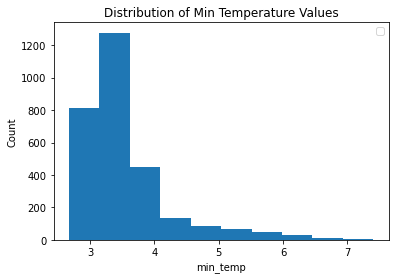

In [139]:
plt.hist(nasa_data['min_temp'])
plt.xlabel('min_temp')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Min Temperature Values')
plt.show()
#px.histogram(data_frame = nasa_data, x = 'min_temp', title = 'Distribution of Min Temperature Values')

No handles with labels found to put in legend.


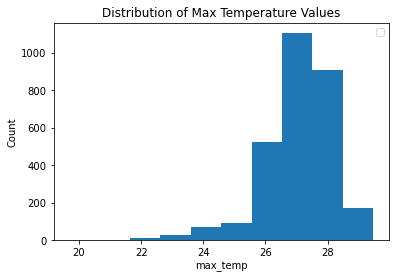

In [140]:
plt.hist(nasa_data['max_temp'])
plt.xlabel('max_temp')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Max Temperature Values')
plt.show()
#px.histogram(data_frame = nasa_data, x ='max_temp', title = 'Distribution Of Max Temperature Values')

No handles with labels found to put in legend.


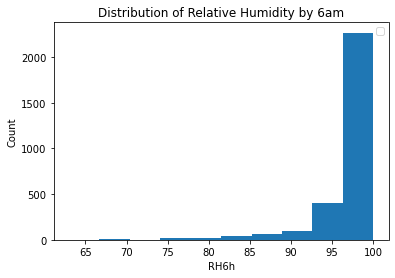

In [141]:
plt.hist(nasa_data['RH6h'])
plt.xlabel('RH6h')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Relative Humidity by 6am')
plt.show()
#px.histogram(data_frame = nasa_data, x = 'RH6h', title = 'Distribution of Relative Humidity by 6am')

No handles with labels found to put in legend.


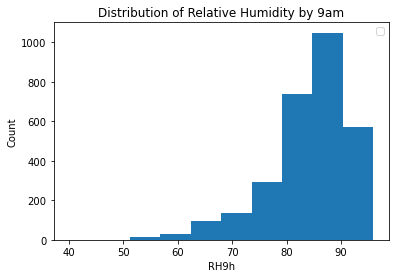

In [142]:
plt.hist(nasa_data['RH9h'])
plt.xlabel('RH9h')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Relative Humidity by 9am')
plt.show()
#px.histogram(data_frame = nasa_data, x = 'RH9h', title = 'Distribution of Relative Humidity by 9am')

No handles with labels found to put in legend.


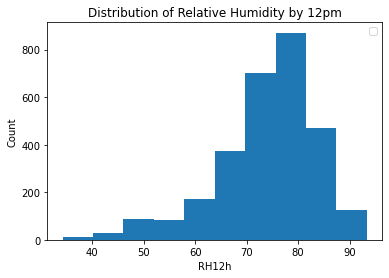

In [143]:
plt.hist(nasa_data['RH12h'])
plt.xlabel('RH12h')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Relative Humidity by 12pm')
plt.show()
#px.histogram(data_frame = nasa_data, x = 'RH12h', title = 'Distribution of Relative Humidity by 12pm')

No handles with labels found to put in legend.


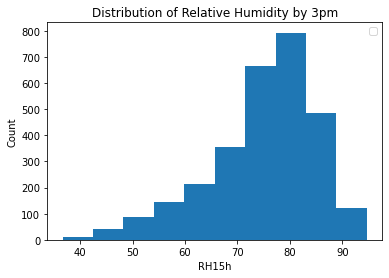

In [144]:
plt.hist(nasa_data['RH15h'])
plt.xlabel('RH15h')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Relative Humidity by 3pm')
plt.show()
#px.histogram(data_frame = nasa_data, x = 'RH15h', title = 'Distribution of Relative Humidity by 3pm')

No handles with labels found to put in legend.


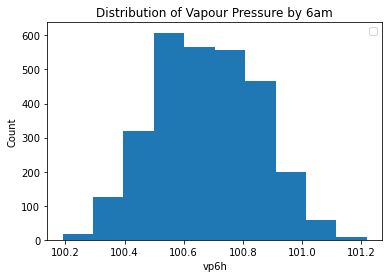

In [145]:
plt.hist(nasa_data['vp6h'])
plt.xlabel('vp6h')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Vapour Pressure by 6am')
plt.show()
#px.histogram(data_frame = nasa_data, x = 'vp6h', title = 'Distribution of Vapour Pressure by 6am')

No handles with labels found to put in legend.


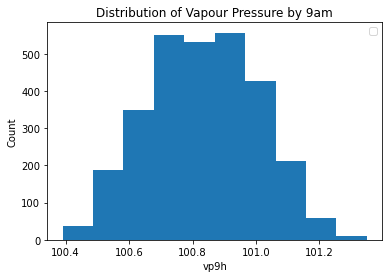

In [146]:
plt.hist(nasa_data['vp9h'])
plt.xlabel('vp9h')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Vapour Pressure by 9am')
plt.show()
#px.histogram(data_frame = nasa_data, x = 'vp9h', title = 'Distribution of Vapour Pressure by 9am')

No handles with labels found to put in legend.


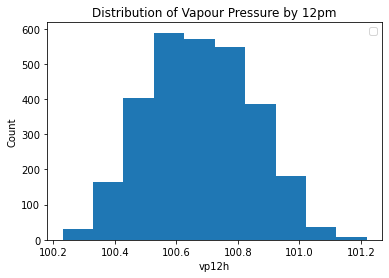

In [147]:
plt.hist(nasa_data['vp12h'])
plt.xlabel('vp12h')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Vapour Pressure by 12pm')
plt.show()
#px.histogram(data_frame = nasa_data, x = 'vp12h', title = 'Distribution of Vapour Pressure by 12pm')

No handles with labels found to put in legend.


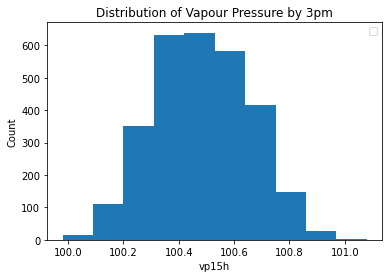

In [148]:
plt.hist(nasa_data['vp15h'])
plt.xlabel('vp15h')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Vapour Pressure by 3pm')
plt.show()
#px.histogram(data_frame = nasa_data, x = 'vp15h', title = 'Distribution of Vapour Pressure by 3pm')

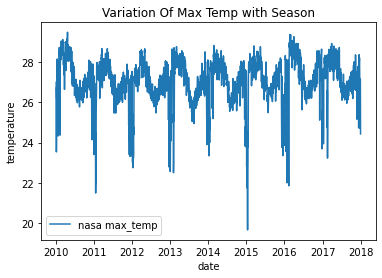

In [111]:
plt.plot(nasa_data['Dates'], nasa_data['max_temp'], label = 'nasa max_temp')
plt.xlabel('date')
plt.ylabel('temperature')
plt.legend()
plt.title('Variation Of Max Temp with Season')
plt.show()
#px.line(data_frame = nasa_data, x = 'Dates', y = 'max_temp', title = 'Variation Of Max Temp with Season')

This shows the variation of Temperature Observed in a Tropical region

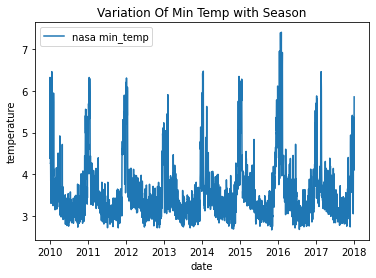

In [112]:
plt.plot(nasa_data['Dates'], nasa_data['min_temp'], label = 'nasa min_temp')
plt.xlabel('date')
plt.ylabel('temperature')
plt.legend()
plt.title('Variation Of Min Temp with Season')
plt.show()
#px.line(data_frame = nasa_data, x = 'Dates', y = 'min_temp', title = 'Variation Of Min Temp with Season')

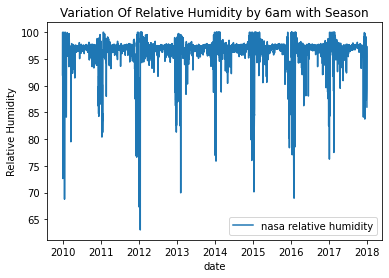

In [113]:
plt.plot(nasa_data['Dates'], nasa_data['RH6h'], label = 'nasa relative humidity')
plt.xlabel('date')
plt.ylabel('Relative Humidity')
plt.legend()
plt.title('Variation Of Relative Humidity by 6am with Season')
plt.show()
#px.line(data_frame = nasa_data, x = 'Dates', y = 'RH6h', title = 'Variation Of Relative Humidity by 6am with Season')

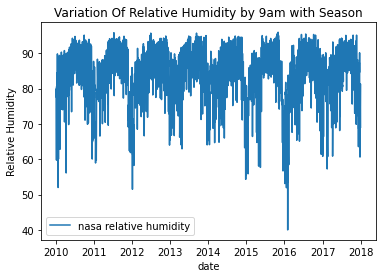

In [114]:
plt.plot(nasa_data['Dates'], nasa_data['RH9h'], label = 'nasa relative humidity')
plt.xlabel('date')
plt.ylabel('Relative Humidity')
plt.legend()
plt.title('Variation Of Relative Humidity by 9am with Season')
plt.show()
#px.line(data_frame = nasa_data, x = 'Dates', y = 'RH9h', title = 'Variation Of Relative Humidity by 9am with Season')

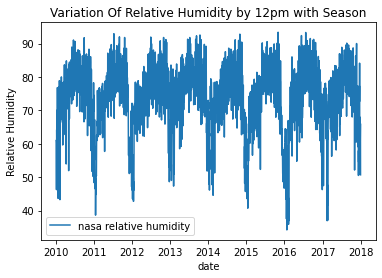

In [115]:
plt.plot(nasa_data['Dates'], nasa_data['RH12h'], label = 'nasa relative humidity')
plt.xlabel('date')
plt.ylabel('Relative Humidity')
plt.legend()
plt.title('Variation Of Relative Humidity by 12pm with Season')
plt.show()
#px.line(data_frame = nasa_data, x = 'Dates', y = 'RH12h', title = 'Variation Of Relative Humidity by 12pm with Season')

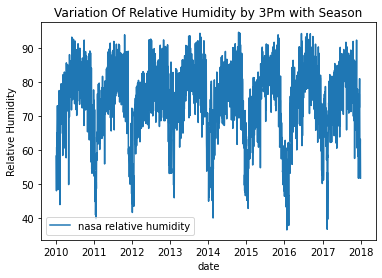

In [116]:
plt.plot(nasa_data['Dates'], nasa_data['RH15h'], label = 'nasa relative humidity')
plt.xlabel('date')
plt.ylabel('Relative Humidity')
plt.legend()
plt.title('Variation Of Relative Humidity by 3Pm with Season')
plt.show()
#px.line(data_frame = nasa_data, x = 'Dates', y = 'RH15h', title = 'Variation Of Relative Humidity by 3pm with Season')

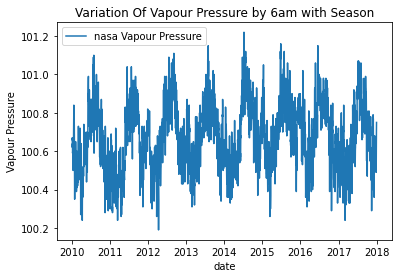

In [117]:
plt.plot(nasa_data['Dates'], nasa_data['vp6h'], label = 'nasa Vapour Pressure')
plt.xlabel('date')
plt.ylabel('Vapour Pressure')
plt.legend()
plt.title('Variation Of Vapour Pressure by 6am with Season')
plt.show()
#px.line(data_frame = nasa_data, x = 'Dates', y = 'vp6h', title = 'Variation Of Vapour Pressure by 6am with Season')

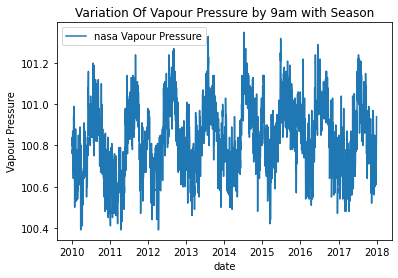

In [118]:
plt.plot(nasa_data['Dates'], nasa_data['vp9h'], label = 'nasa Vapour Pressure')
plt.xlabel('date')
plt.ylabel('Vapour Pressure')
plt.legend()
plt.title('Variation Of Vapour Pressure by 9am with Season')
plt.show()
#px.line(data_frame = nasa_data, x = 'Dates', y = 'vp9h', title = 'Variation Of Vapour Pressure by 9am with Season')

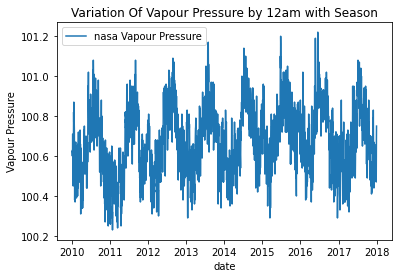

In [119]:
plt.plot(nasa_data['Dates'], nasa_data['vp12h'], label = 'nasa Vapour Pressure')
plt.xlabel('date')
plt.ylabel('Vapour Pressure')
plt.legend()
plt.title('Variation Of Vapour Pressure by 12am with Season')
plt.show()
#px.line(data_frame = nasa_data, x = 'Dates', y = 'vp12h', title = 'Variation Of Vapour Pressure by 12pm with Season')

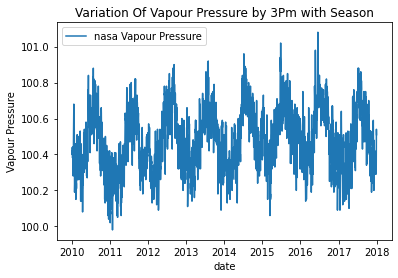

In [120]:
plt.plot(nasa_data['Dates'], nasa_data['vp15h'], label = 'nasa Vapour Pressure')
plt.xlabel('date')
plt.ylabel('Vapour Pressure')
plt.legend()
plt.title('Variation Of Vapour Pressure by 3Pm with Season')
plt.show()
#px.line(data_frame = nasa_data, x = 'Dates', y = 'vp15h', title = 'Variation Of Vapour Pressure by 3pm with Season')

# CORRELATION OF NASA DATA

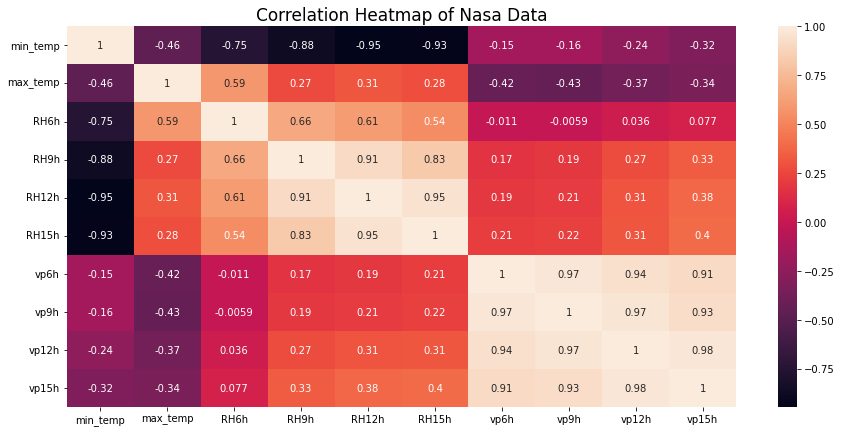

In [90]:
plt.figure(figsize=(15,7))
plt.title('Correlation Heatmap of Nasa Data', size = 17)
sns.heatmap(nasa_data.corr(), annot = True)
plt.show()

# visualizing the correlations from Nasa Data

No handles with labels found to put in legend.


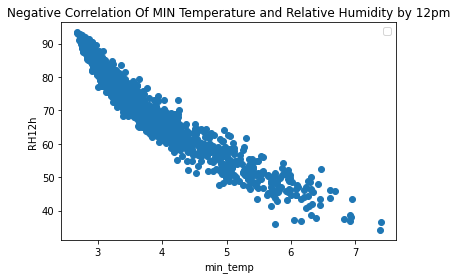

In [121]:
plt.scatter(nasa_data['min_temp'],nasa_data['RH12h'])
plt.xlabel('min_temp')
plt.ylabel('RH12h')
plt.legend()
plt.title('Negative Correlation Of MIN Temperature and Relative Humidity by 12pm')
plt.show()
#px.scatter(data_frame = nasa_data, x = 'min_temp', y = 'RH12h', title = 'Negative Correlation Between Min temp and Relative Humidity by 12pm')

No handles with labels found to put in legend.


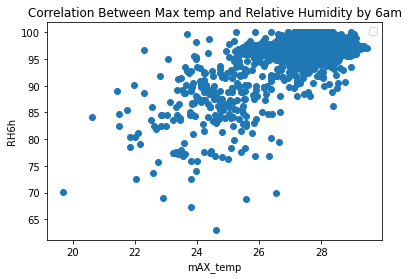

In [124]:
plt.scatter(nasa_data['max_temp'],nasa_data['RH6h'])
plt.xlabel('mAX_temp')
plt.ylabel('RH6h')
plt.legend()
plt.title('Correlation Between Max temp and Relative Humidity by 6am')
plt.show()
#px.scatter(data_frame = nasa_data, x = 'max_temp', y = 'RH6h', title = 'Correlation Between Max temp and Relative Humidity by 6am')

# Comparison Between Nasa Data and Nimet Data

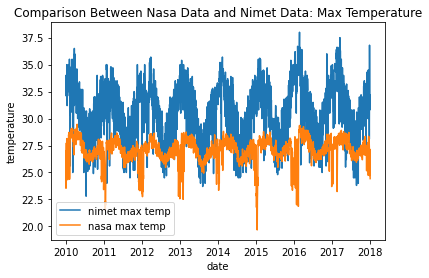

In [93]:
plt.plot(nimet_data['DATES'], nimet_data['MAX TEMP (0C)'], label = 'nimet max temp')
plt.plot(nasa_data['Dates'], nasa_data['max_temp'], label = 'nasa max temp')
plt.xlabel('date')
plt.ylabel('temperature')
plt.legend()
plt.title('Comparison Between Nasa Data and Nimet Data: Max Temperature')
plt.show()

This shows that in the same thime period different values were obtained by Nasa and Nimet. The progression of both sugget they are from a similar region but may not be from the same location. This suggets that in building models the predicted max temp from the nasa data will therefore vary with that from the nimet data.

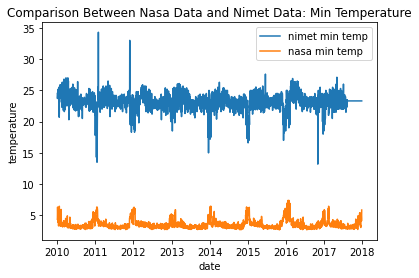

In [94]:
plt.plot(nimet_data['DATES'], nimet_data['MIN TEMP  (0C)'], label = 'nimet min temp')
plt.plot(nasa_data['Dates'], nasa_data['min_temp'], label = 'nasa min temp')
plt.xlabel('date')
plt.ylabel('temperature')
plt.legend()
plt.title('Comparison Between Nasa Data and Nimet Data: Min Temperature')
plt.show()

this shows that there is a huge variation in values of Min temperature obtained from Nasa and Nimet.

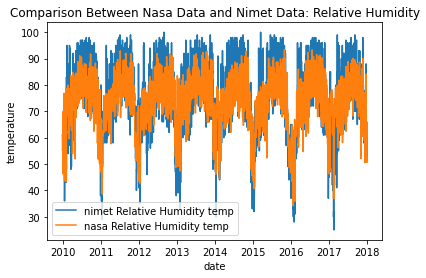

In [95]:
plt.plot(nimet_data['DATES'], nimet_data['RH% 1200Z'], label = 'nimet Relative Humidity temp')
plt.plot(nasa_data['Dates'], nasa_data['RH12h'], label = 'nasa Relative Humidity temp')
plt.xlabel('date')
plt.ylabel('temperature')
plt.legend()
plt.title('Comparison Between Nasa Data and Nimet Data: Relative Humidity')
plt.show()

The relative Humidity Values shows Much more similarity 

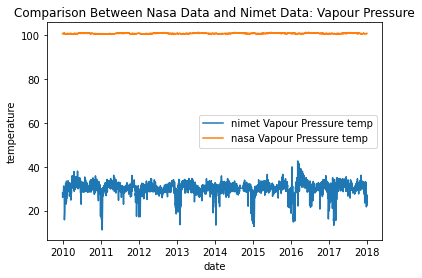

In [96]:
plt.plot(nimet_data['DATES'], nimet_data['Vapour Pressure 1200Z'], label = 'nimet Vapour Pressure temp')
plt.plot(nasa_data['Dates'], nasa_data['vp12h'], label = 'nasa Vapour Pressure temp')
plt.xlabel('date')
plt.ylabel('temperature')
plt.legend()
plt.title('Comparison Between Nasa Data and Nimet Data: Vapour Pressure')
plt.show()

This show a huge variation of values. Hence,due to this factor Models to be built would be made separately to predict future weather of each dataset.

This variation might be due to differences in method of collecting the Data or data may not be collected from the exact same location.

# Regression Model For Nimet Data